<a href="https://colab.research.google.com/github/lvaneykeren/dllearning/blob/main/20210608_Intro_to_DL_Digit_recognition_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize some packages

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# Load Dataset

In [2]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# Normalize our input

In [3]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

#define your network here

You can use the following documentation to prepare your network

https://www.geeksforgeeks.org/keras-conv2d-class/ -> you only need filters, kernel-size and activation-function and input_shape as parameters for your first version. Later you can play with the other parameters.

https://keras.io/api/layers/reshaping_layers/flatten/



Make sure you have a convolution layer, a pooling layer and an output layer!


In [59]:
# define cnn model
def define_model():
  #PLEASE PUT YOUR NETWORK HERE!
  model = Sequential()
  model.add(Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(10, activation='sigmoid'))
  
  # compile model
  #opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Please have a look at the summarization of the model. Can you explain the number of parameteres t each layer?

In [60]:
define_model().summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                23050     
Total params: 23,466
Trainable params: 23,466
Non-trainable params: 0
_________________________________________________________________


# Evaluate model

In [30]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

In [31]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


Run the code below, if your model is correct, there should be no errors.

How are we using cross validation in this example?
You can increase the number of folds, but training might take some time


In [61]:
n_folds = 2
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(trainX):
  # define model
  model = define_model()
  # select rows for train and test
  trainX_cross, trainY_cross, testX_cross, testY_cross = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
  # fit model
  history = model.fit(trainX_cross, trainY_cross, epochs=6, batch_size=32, validation_data=(testX_cross, testY_cross), verbose=1)
  # evaluate model
  _, acc = model.evaluate(testX_cross, testY_cross, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)

Epoch 1/6
938/938 [==============================] - 15s 16ms/step - loss: 0.5734 - accuracy: 0.8406 - val_loss: 0.1599 - val_accuracy: 0.9536
Epoch 2/6
938/938 [==============================] - 14s 15ms/step - loss: 0.1263 - accuracy: 0.9633 - val_loss: 0.1091 - val_accuracy: 0.9680
Epoch 3/6
938/938 [==============================] - 14s 15ms/step - loss: 0.0801 - accuracy: 0.9763 - val_loss: 0.0834 - val_accuracy: 0.9760
Epoch 4/6
938/938 [==============================] - 14s 15ms/step - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0805 - val_accuracy: 0.9767
Epoch 5/6
938/938 [==============================] - 14s 15ms/step - loss: 0.0507 - accuracy: 0.9855 - val_loss: 0.0718 - val_accuracy: 0.9784
Epoch 6/6
938/938 [==============================] - 14s 15ms/step - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.0681 - val_accuracy: 0.9800
> 98.003
Epoch 1/6
938/938 [==============================] - 15s 16ms/step - loss: 0.6168 - accuracy: 0.8200 - val_loss: 0.1438 - val_accurac

How do you interprete these images?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


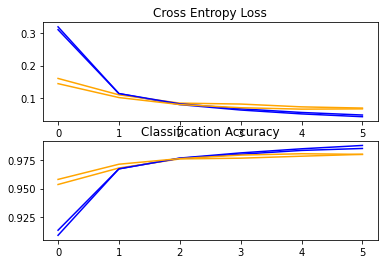

In [62]:
for i in range(len(histories)):
  # plot loss
  pyplot.subplot(2, 1, 1)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(histories[i].history['loss'], color='blue', label='train')
  pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(2, 1, 2)
  pyplot.title('Classification Accuracy')
  pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
  pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
pyplot.show()

Accuracy: mean=98.002 std=0.002, n=2


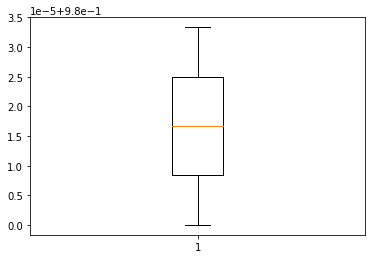

In [63]:
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()